> 提示：项目 Notebook 模板主要为了帮助同学了解如何划分报告结构，提示项目的注意事项。如果你理解项目的所有要求，那么完全可以自己创建新的 Notebook 来完成报告。

> 提交项目时，建议删除所有提示性文字，只保留你自己的 Markdown 说明文字和代码注释。

# 清理与分析数据（替换为你自己的报告标题）
## 收集

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [4]:
df_tweet = pd.read_json('tweet_json.txt',lines=True)

## 评估
### 目测评估

In [5]:
df_twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
df_tweet

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20548,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3240,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12053,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2142,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",66596,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,19548,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28187,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4403,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7684,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [10]:
text = "ThisIsTest010.183.255.254++gansu++"
pattern = re.compile(r"(?<=[0-9\.]{4})(\w+)([+a-z]+)")
pattern.search(text).groups()

('254', '++gansu++')

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

### 编程评估

In [8]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [20]:
df_twitter['text'][200]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

#### 质量
##### `df_twitter` 表格（将`dataframe_name1`修改为你的数据集名称，然后删掉括号内的提示）
- 问题的数量可能不同，你可以继续换行添加更多列表项，或者删除多余的 `- `
- in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp、expanded_urls 列数据缺失 ；
- timestamp、retweeted_status_timestamp列数据类型应为datatime；
- 狗狗地位存在双重身份的现象；
- name列，即狗狗名字存在首字母小写形式,其中None被标记为字符串；
- 狗狗的分子分母评分存在错误；
- 

##### `df_predictions` 表格（将`dataframe_name2`修改为你的数据集名称，然后删掉括号内的提示）
- P1,P2,P3列的首字母小写形式
- 有存在重复的jpg_url；
- 
- 


##### `df_tweet` 表格（将`dataframe_name3`修改为你的数据集名称，然后删掉括号内的提示）
- contributors,coordinates,extended_entities,geo,in_reply...5列,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status3列,retweet_status存在缺失值；
- created_at列数据类型不对；
- 
- 


#### 整洁度
- df_twitter表中狗狗地位可以合并成一列‘status’；
- df_tweet表中display_text_range可分为起始列和结束列；
- df_tweet表中的retweet_count和favorite_count两列需要提取出来合并到df_twitter表中



## 清理

In [11]:
# 备份三个数据集
twitter_clean = df_twitter.copy()
predictions_clean = df_predictions.copy()
tweet_clean = df_tweet.copy()

#### 问题描述一
三个表格中存在缺失值
##### 定义
简述一下问题的解决方案
运用dropna的方式丢弃缺失值；
##### 代码

In [12]:
# 解决问题一的代码
twitter_clean=twitter_clean.fillna(0)
predictions_clean=predictions_clean.fillna(0)
tweet_clean=tweet_clean.fillna(0)

##### 测试

In [13]:
# 测试问题一是否正确清理完成
twitter_clean.info()
predictions_clean.info()
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null float64
in_reply_to_user_id           2356 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null float64
retweeted_status_user_id      2356 non-null float64
retweeted_status_timestamp    2356 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64

#### 问题描述二
狗狗的四个地位列可以整合到一个列中
##### 定义
简述一下问题的解决方案
删除原先四列狗狗地位，从text列中用正则表达式提取出狗狗对应地位，重新分配到新的status列中
##### 代码

In [14]:
# 解决问题二的代码
def extract_dog_status(t):
    result = []
    for i in ['doggo','floofer','pupper','puppo','floof']:
        if i in t:
            result.append(i)
    x = ','.join(result)
    return x
twitter_clean['status']=twitter_clean['text'].apply(extract_dog_status)
for i in range(len(twitter_clean['status'])):
    if ',' in twitter_clean['status'][i]:
        if i in [46,172,575,582,705,774,1022]:
            twitter_clean['status'][i]=twitter_clean['status'][i].split(',')[0]
        elif i in [531,565,778,822,889,1063,1113]:
            twitter_clean['status'][i]='Multiple'
twitter_clean['status'][191]='puppo'
twitter_clean['status'][956]=''

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWith

##### 测试

In [15]:
# 测试问题二是否正确清理完成
twitter_clean.info()
twitter_clean.status.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null float64
in_reply_to_user_id           2356 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null float64
retweeted_status_user_id      2356 non-null float64
retweeted_status_timestamp    2356 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
status                   

            1939
pupper       262
doggo         89
puppo         36
floof         19
Multiple       7
floofer        4
Name: status, dtype: int64

In [16]:
#### 问题描述三
#name列的内容格式不统一,且缺失值None被判定为str
##### 定义
#简述一下问题的解决方案
#运用capitalize将其内容格式统一，用replace替换None为缺失值，然后fillna
##### 代码
twitter_clean['name'].replace('None',np.nan,inplace=True)
twitter_clean.fillna({'name':''},inplace=True)
twitter_clean['name'] = twitter_clean['name'].str.capitalize()
# 测试问题三是否正确清理完成
twitter_clean['name'].value_counts()

                  745
A                  55
Charlie            12
Oliver             11
Cooper             11
Lucy               11
Penny              10
Lola               10
Tucker             10
Winston             9
Bo                  9
Sadie               8
The                 8
Buddy               7
Toby                7
Daisy               7
Bailey              7
An                  7
Milo                6
Jack                6
Dave                6
Bella               6
Oscar               6
Koda                6
Jax                 6
Rusty               6
Leo                 6
Stanley             6
Scout               6
Finn                5
                 ... 
Georgie             1
Willie              1
Ralphson            1
Lili                1
Grizzie             1
Michelangelope      1
Philippe            1
Jockson             1
Sonny               1
Jazz                1
Thor                1
Huck                1
Ferg                1
Alexander           1
Tuck      

In [17]:
#### 问题描述四
#predictions_clean表中的P1,P2,P3数据类型以及数据格式不统一
##### 定义
#简述一下问题的解决方案
#运用astype转化其数据类型为category，运用str.capitalize将其格式统一
##### 代码
predictions_clean['p1'] = predictions_clean['p1'].astype('category')
predictions_clean['p2'] = predictions_clean['p2'].astype('category')
predictions_clean['p3'] = predictions_clean['p3'].astype('category')
predictions_clean['p1'] = predictions_clean['p1'].str.capitalize()
predictions_clean['p2'] = predictions_clean['p2'].str.capitalize()
predictions_clean['p3'] = predictions_clean['p3'].str.capitalize()
# 测试问题四是否正确清理完成
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
#### 问题描述五
#狗狗评分不准确
##### 定义
#简述一下问题的解决方案
#从text列中运用正则表达式提取出正确的分子分母评分，然后分别覆盖原先的两列评分；
##### 代码
twitter_clean['rating']=twitter_clean['text'].str.findall('\s{1}((?:\d+\.)?\d+)/(\d+)')
for i in range(len(twitter_clean['rating'])):
    if len(twitter_clean['rating'][i])>1:
        if i in [561,766,784,860,1007,1068,1165,1202,1220,1359,1459,1465,1508,1538,1795,1832,1897,1901,2010,2064,2113,2177,2263,2272,2298,2306]:
            twitter_clean['rating_numerator'][i]=(int(twitter_clean['rating'][i][0][0])+int(twitter_clean['rating'][i][1][0]))/2
            twitter_clean['rating_denominator'][i]=(int(twitter_clean['rating'][i][0][1])+int(twitter_clean['rating'][i][1][1]))/2
        elif i in [55,313,1662,2335]:
            twitter_clean['rating_numerator'][i]=twitter_clean['rating'][i][1][0]
            twitter_clean['rating_denominator'][i]=twitter_clean['rating'][i][1][1]
        else:
            twitter_clean['rating_numerator'][i]=twitter_clean['rating'][i][0][0]
            twitter_clean['rating_denominator'][i]=twitter_clean['rating'][i][0][1]
    elif len(twitter_clean['rating'][i])==1:
        twitter_clean['rating_numerator'][i]=twitter_clean['rating'][i][0][0]
        twitter_clean['rating_denominator'][i]=twitter_clean['rating'][i][0][1]
twitter_clean['rating_numerator'][twitter_clean['rating_numerator']=='666']=189
twitter_clean['rating_numerator'][twitter_clean['rating_numerator']=='007']=7
# 测试问题五是否正确清理完成
twitter_clean['rating_numerator'].value_counts()
twitter_clean['rating_denominator'].value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be s

10     2338
15        2
80        2
50        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
30        1
20        1
16        1
Name: rating_denominator, dtype: int64

In [19]:
#### 问题描述六
#狗狗名字不准确
##### 定义
#简述一下问题的解决方案
#从text列中运用正则表达式提取出正确的狗狗名字；
##### 代码
name=[]
for i in twitter_clean['text']:
    try:
        a=re.search('(?:This is|Meet|name is|Say hello to|named) ([A-Z][a-z]*)',str(i)).group(1).title()
    except:
        a=(np.nan)
    name.append(a)
twitter_clean['name']=name
# 测试问题六是否正确清理完成
twitter_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5            NaN
6            Jax
7            NaN
8           Zoey
9         Cassie
10          Koda
11         Bruno
12           NaN
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22           NaN
23        Canela
24           NaN
25           NaN
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326         NaN
2327         NaN
2328         NaN
2329         NaN
2330         NaN
2331         NaN
2332         NaN
2333         NaN
2334         NaN
2335         NaN
2336         NaN
2337         NaN
2338         NaN
2339         NaN
2340         NaN
2341         NaN
2342         NaN
2343         NaN
2344         NaN
2345         NaN
2346         NaN
2347         NaN
2348         NaN
2349         NaN
2350         NaN
2351         NaN
2352         NaN
2353         N

In [20]:
twitter_clean.drop(['doggo','floofer','pupper','puppo'],axis = 1,inplace=True)
twitter_clean.drop(['rating'],axis=1,inplace=True)

In [21]:
#### 问题描述七
#timestamp、retweeted_status_timestamp列数据类型不准确；
##### 定义
#简述一下问题的解决方案
#运用astype函数将timestamp、retweeted_status_timestamp列数据类型修改为datatime；
##### 代码
twitter_clean.timestamp=pd.to_datetime(twitter_clean.timestamp)
twitter_clean.retweeted_status_timestamp=pd.to_datetime(twitter_clean.retweeted_status_timestamp)

In [22]:
# 测试问题七是否正确清理完成
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null float64
in_reply_to_user_id           2356 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null float64
retweeted_status_user_id      2356 non-null float64
retweeted_status_timestamp    2356 non-null datetime64[ns]
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null object
rating_denominator            2356 non-null int64
name                          1531 non-null object
status                        2356 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(6)
memory usage: 257.8+ KB


In [23]:
#### 问题描述八
#tweet_clean表中的retweet_count和favorite_count两列需要提取出来合并到twitter_clean表中；
##### 定义
#简述一下问题的解决方案
#运用函数pd.merge将retweet_count和favorite_count两列合并到twitter_clean中去；
##### 代码
newdf=pd.DataFrame(tweet_clean,columns=['id','retweet_count','favorite_count'])
newdf.rename(columns=lambda x:x.replace('id','tweet_id'),inplace=True)
twitter_clean=pd.merge(twitter_clean,newdf,on=['tweet_id'],how='left')

In [24]:
#测试问题八是否正确清理完成
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,status,retweet_count,favorite_count
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0.0,0.0,1970-01-01,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,8842.0,39492.0
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,0.0,0.0,1970-01-01,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,6480.0,33786.0
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,0.0,0.0,1970-01-01,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,4301.0,25445.0
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0.0,0.0,1970-01-01,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,8925.0,42863.0
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,0.0,0.0,1970-01-01,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,9721.0,41016.0


In [25]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
predictions_clean[predictions_clean.jpg_url.duplicated()==True]
#### 问题描述九
#狗狗预测表，即predictions_clean中的jpg_url中有66项重复项；若jpg_url针对每一张不同的图片的链接，则需要删除
##### 定义
#简述一下问题的解决方案
#运用方法drop.duplicates()可删除重复项；
##### 代码
predictions_clean.jpg_url.drop_duplicates()
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
twitter_clean[twitter_clean['favorite_count']==twitter_clean['favorite_count'].max()]
twitter_clean[twitter_clean['retweet_count']==twitter_clean['retweet_count'].max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,status,retweet_count,favorite_count
1039,744234799360020481,0.0,0.0,2016-06-18 18:26:18,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,0.0,0.0,1970-01-01,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,doggo,79116.0,130533.0


### 存储清理后的主数据集

In [28]:
# 将清理后的主数据集保存为 csv 文件或者 SQLite 数据库文件
twitter_clean.to_csv('twitter_csv')
predictions_clean.to_csv('predictions_csv')

## 分析和可视化

> 提示：
- 在 Notebook 使用 pandas 或 SQL 分析主数据集，并生成至少三（3）个独立的结论。
- 在 Notebook 中使用 Python 绘图库或在 Tableau 中至少生成一（1）个可视化图表。


/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


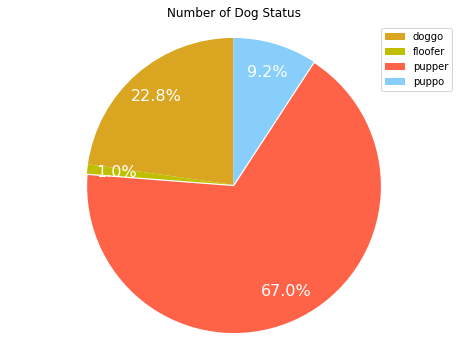

In [64]:
# 分析或可视化代码
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(1,1,1)
list_rating=[len(twitter_clean[twitter_clean.status=='doggo']),
            len(twitter_clean[twitter_clean.status=='floofer']),
            len(twitter_clean[twitter_clean.status=='pupper']),
            len(twitter_clean[twitter_clean.status=='puppo'])]
explode=(0,0,0.01,0)
colors=['goldenrod','y','tomato','lightskyblue']
labels=['doggo','floofer','pupper','puppo']
plt.pie(list_rating,explode=explode,labels=labels,colors=colors,
        autopct='%1.1f%%',shadow=False,pctdistance=0.8,
        startangle=90,textprops={'fontsize':16,'color':'w'})
plt.title('Number of Dog Status')
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()
#ax.hist(list_rating,color='r')
#ax.set_title('Number of Dog Status')
#ax.set_xlabel('Status')

与上面分析或可视化相关的见解或说明

In [57]:
# 分析或可视化代码
#结论1：在上传的狗狗中，地位为pupper的狗狗最多，doggo次之，最少的floofer；
#结论2：对于所有狗狗所有评分中，虽然分子差异较大，但总体分数还是集中在[1,2]区间；
#结论3：在众多的上传的狗狗中，网友最喜欢的是一只地位为puppo的狗狗,而转发最多的是一只地位为doggo的狗狗；

189    @s8n You tried very hard to portray this good ...
Name: text, dtype: object

与上面分析或可视化相关的见解或说明

pandas.core.series.Series

更多说明或总结等

> 提示：提交项目前建议删除 Notebook 中的所有提示性文字和注释，只保留自己的 Markdown 文本和代码注释。